In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df_fuji_inter = pd.read_csv("../../../DataSet/Fuji/fuji_inter.csv")
df_fuji_inter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    169 non-null    object
 1   Fuji    169 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [3]:
df_fuji_inter["Date"] = pd.to_datetime(df_fuji_inter["Date"], unit="ns")
df_fuji_inter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    169 non-null    datetime64[ns]
 1   Fuji    169 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.8 KB


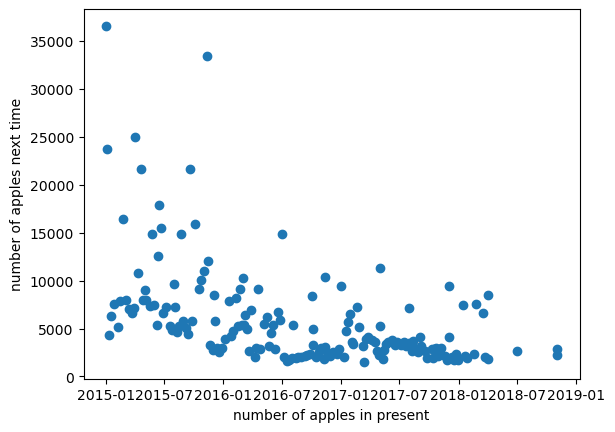

In [7]:
plt.scatter(df_fuji_inter["Date"], df_fuji_inter["Fuji"])
plt.xlabel("number of apples in present")
plt.ylabel("number of apples next time")
plt.show()

In [ ]:
df_fuji_inter = df_fuji_inter[df_fuji_inter["Fuji"] <= 10000]

In [ ]:
df_fuji_inter["y"] = df_fuji_inter["Fuji"].shift(-1)
df_fuji_inter.dropna(inplace=True)
df_fuji_inter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 2 to 167
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    147 non-null    datetime64[ns]
 1   Fuji    147 non-null    int64         
 2   y       147 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 4.6 KB


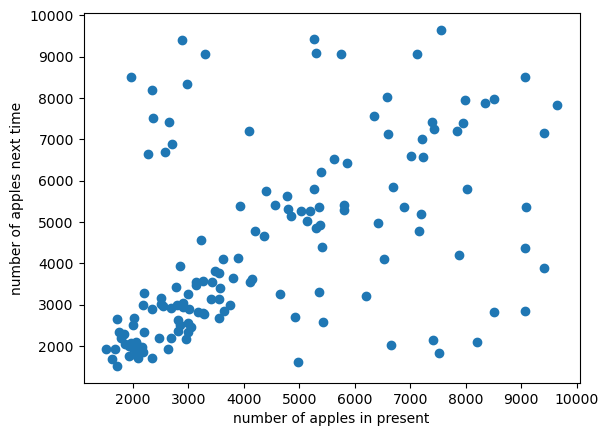

In [ ]:
plt.scatter(df_fuji_inter["Fuji"], df_fuji_inter["y"])
plt.xlabel("number of apples in present")
plt.ylabel("number of apples next time")
plt.show()

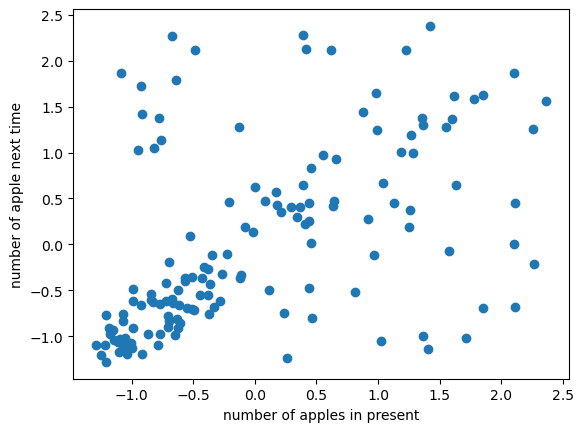

In [ ]:
feature_fuji = np.array(df_fuji_inter["Fuji"]).reshape(-1, 1)
label_fuji = np.array(df_fuji_inter["y"]).reshape(-1, 1)

scaler = StandardScaler()
scaler.fit(feature_fuji)
feature_fuji = scaler.transform(feature_fuji)
scaler.fit(label_fuji)
label_fuji = scaler.transform(label_fuji)
plt.scatter(feature_fuji, label_fuji)
plt.xlabel("number of apples in present")
plt.ylabel("number of apple next time")
plt.show()

In [ ]:
#Seed = 762701 with mean absolute error

In [ ]:
feature_fuji_train, feature_fuji_test, label_fuji_train, label_fuji_test = train_test_split(feature_fuji, label_fuji, random_state=762701)
model = LinearRegression()
model.fit(feature_fuji_train, label_fuji_train)

LinearRegression()

Mean Absolute Error: 0.3501074019518754
The Mean Square Error: 0.20469971146049976
The R2 score: 0.6000132408839973


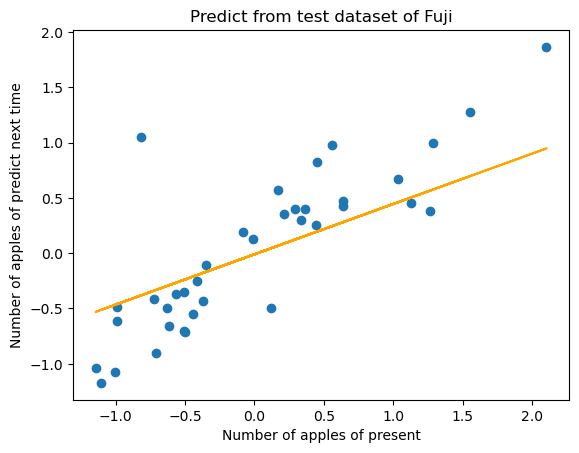

In [ ]:
y_predict = model.predict(feature_fuji_test)
print(f"Mean Absolute Error: {mean_absolute_error(label_fuji_test, y_predict)}")
print(f"The Mean Square Error: {mean_squared_error(label_fuji_test, y_predict)}")
print(f"The R2 score: {r2_score(label_fuji_test, y_predict)}")

plt.scatter(feature_fuji_test, label_fuji_test)
plt.plot(feature_fuji_test, y_predict, color="orange")
plt.xlabel("Number of apples of present")
plt.ylabel("Number of apples of predict next time")
plt.title("Predict from test dataset of Fuji")
plt.show()

---